In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('/content/data (1).csv')
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [35]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [36]:
df.isnull().sum()

,0
timestamp,0
equipment_energy_consumption,844
lighting_energy,809
zone1_temperature,867
zone1_humidity,801
zone2_temperature,853
zone2_humidity,867
zone3_temperature,802
zone3_humidity,878
zone4_temperature,816


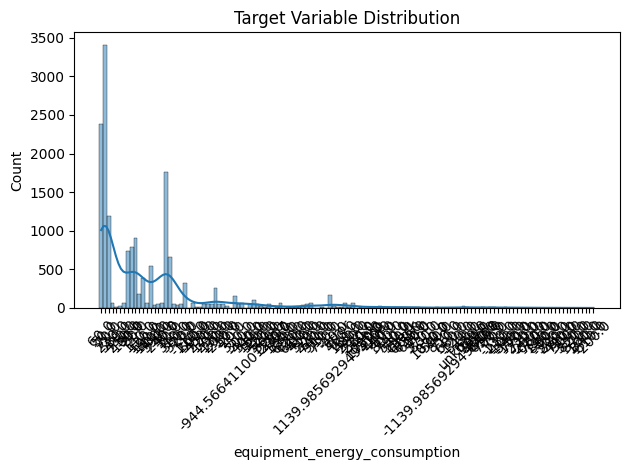

In [37]:
sns.histplot(df['equipment_energy_consumption'], kde=True, bins=50)
plt.title('Target Variable Distribution')
plt.xlabel('equipment_energy_consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Check object columns
object_cols = df.select_dtypes(include='object').columns
print("Object columns:", object_cols)

# Attempt to convert to numeric (except timestamp)
for col in object_cols:
    if col != 'timestamp':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check again
df[object_cols].dtypes

Object columns: Index(['timestamp'], dtype='object')


,0
timestamp,object


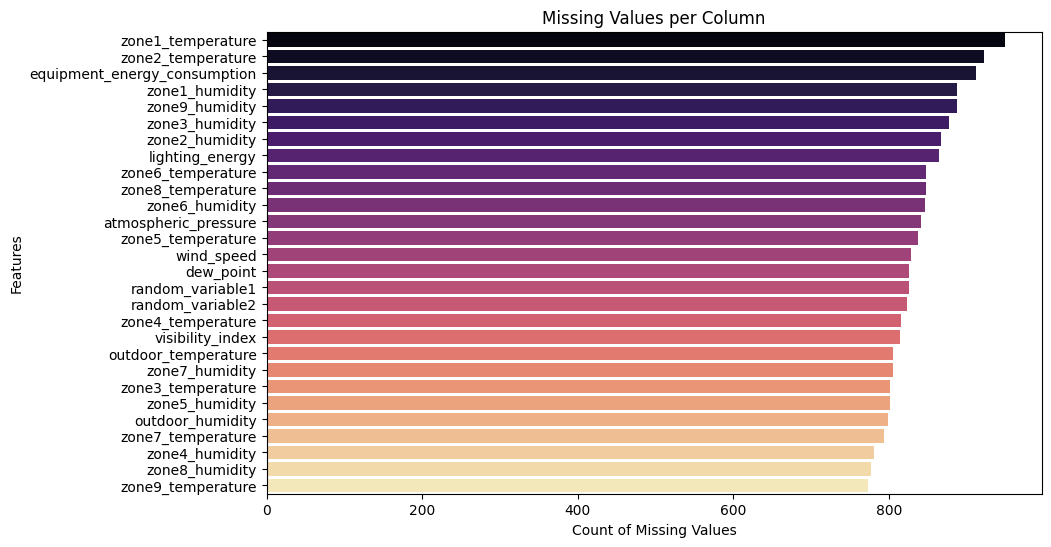

In [40]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, palette='magma')
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Features")
plt.show()


In [41]:
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
equipment_energy_consumption,15945.0,95.810413,182.753554,-1139.985693,50.000000,60.000000,100.000000,1139.985693
zone6_humidity,16010.0,59.162913,52.657787,-353.393026,37.066667,62.766667,86.590000,353.393026
outdoor_humidity,16058.0,78.977595,28.565660,-221.668765,71.000000,84.166667,91.988095,221.668765
random_variable1,16031.0,24.854981,26.214960,-120.170177,12.179924,24.866978,37.950236,170.156325
random_variable2,16033.0,25.093780,25.523631,-120.409590,12.193789,24.834261,37.971764,170.329617
visibility_index,16042.0,38.457150,21.318655,-82.329792,29.000000,40.000000,40.000000,159.606156
zone5_humidity,16056.0,50.289131,18.722516,-141.640143,45.290000,48.854429,53.918333,141.640143
lighting_energy,15993.0,3.938101,14.580575,-86.002966,0.000000,0.000000,0.000000,86.002966
atmospheric_pressure,16015.0,755.757602,13.643585,678.159940,750.800000,756.200000,762.100000,833.392675
zone8_humidity,16080.0,41.853532,12.301530,-94.385668,38.626667,42.040455,46.003889,94.385668


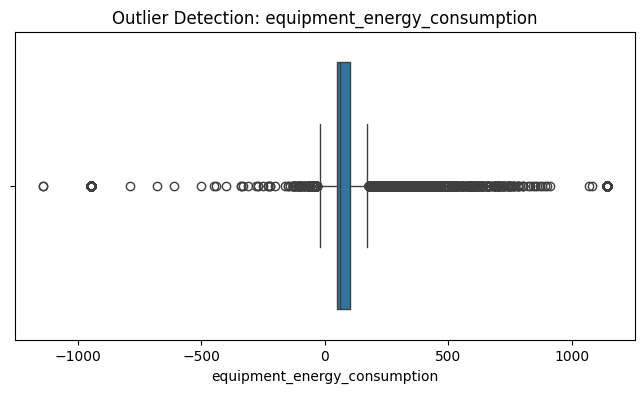

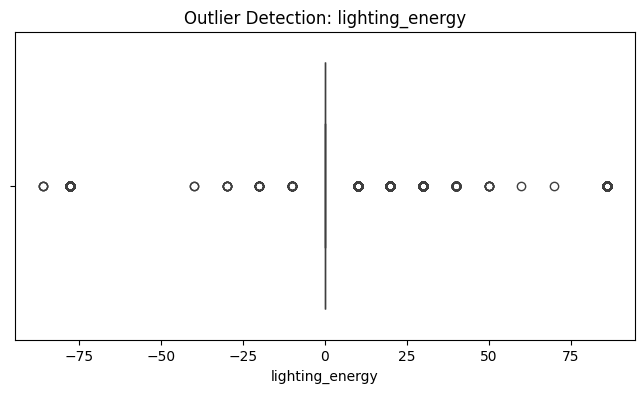

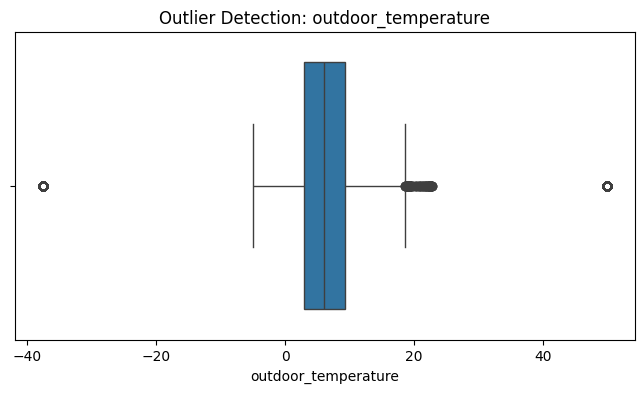

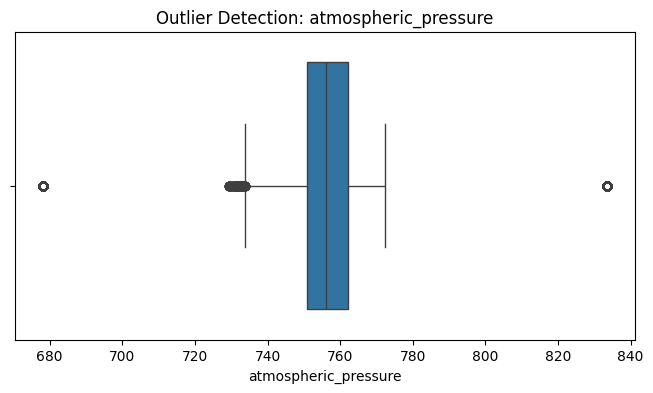

In [42]:
important_cols = ['equipment_energy_consumption', 'lighting_energy', 'outdoor_temperature', 'atmospheric_pressure']

for col in important_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection: {col}")
    plt.show()

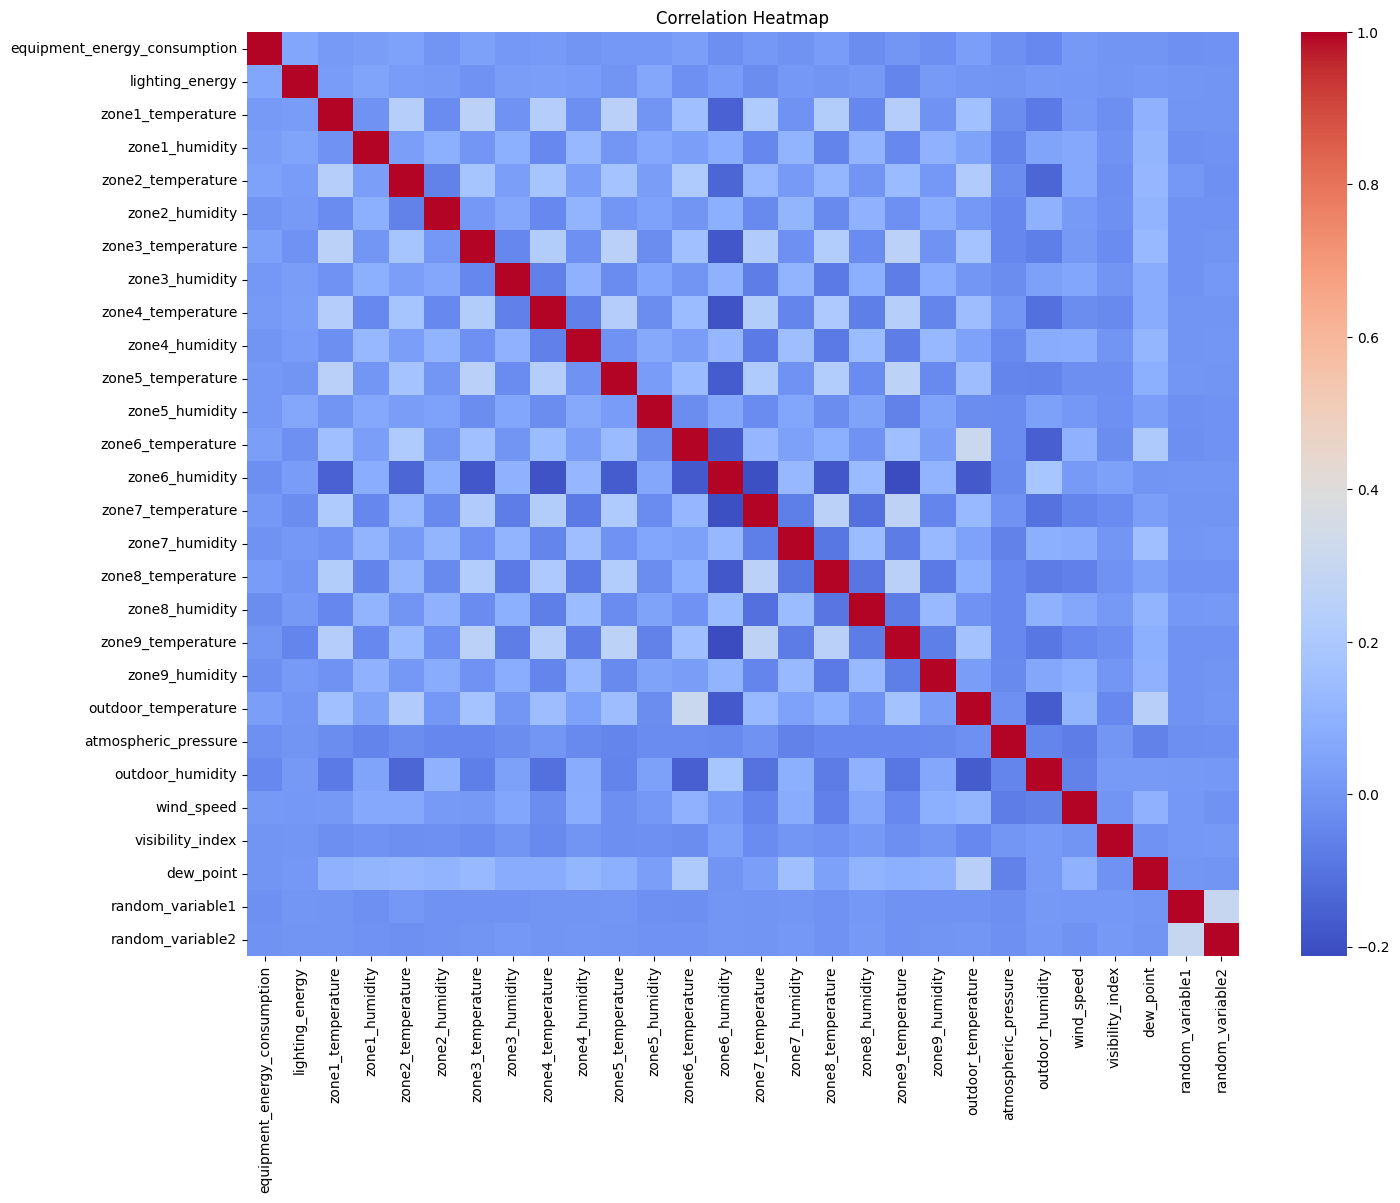

In [43]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [44]:
target_corr = corr_matrix['equipment_energy_consumption'].sort_values(ascending=False)
print(target_corr)

equipment_energy_consumption    1.000000
lighting_energy                 0.057007
zone2_temperature               0.042058
zone3_temperature               0.038033
outdoor_temperature             0.033223
zone6_temperature               0.032136
zone1_humidity                  0.026997
zone8_temperature               0.019716
zone1_temperature               0.018402
zone4_temperature               0.017128
wind_speed                      0.011566
zone5_temperature               0.008938
zone5_humidity                  0.007903
zone7_temperature               0.007255
zone3_humidity                  0.006724
zone9_temperature               0.003985
visibility_index                0.000022
zone4_humidity                 -0.003232
dew_point                      -0.003299
zone2_humidity                 -0.003984
zone7_humidity                 -0.006884
random_variable2               -0.011387
atmospheric_pressure           -0.014060
random_variable1               -0.016155
zone6_humidity  

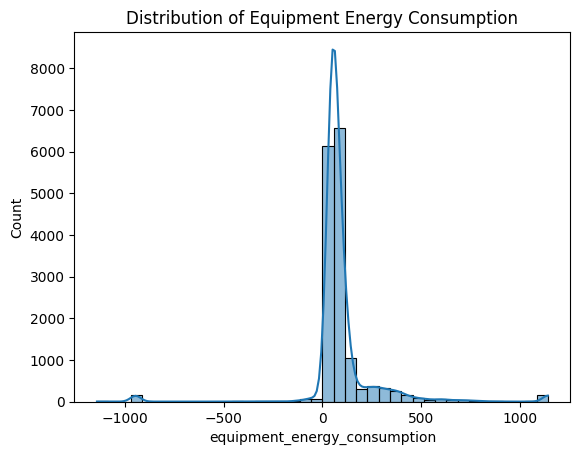

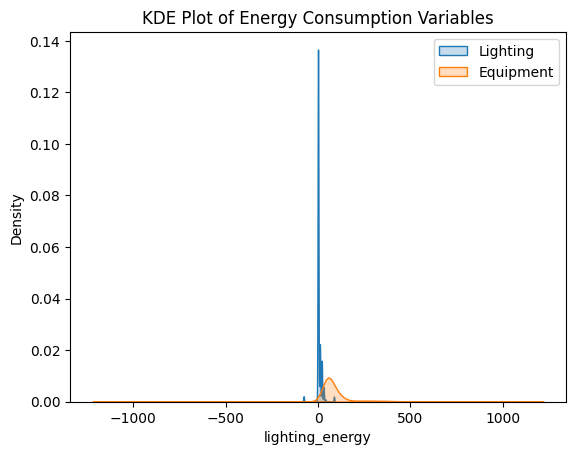

In [45]:
sns.histplot(df['equipment_energy_consumption'], kde=True, bins=40)
plt.title("Distribution of Equipment Energy Consumption")
plt.show()

sns.kdeplot(df['lighting_energy'], label='Lighting', fill=True)
sns.kdeplot(df['equipment_energy_consumption'], label='Equipment', fill=True)
plt.title("KDE Plot of Energy Consumption Variables")
plt.legend()
plt.show()


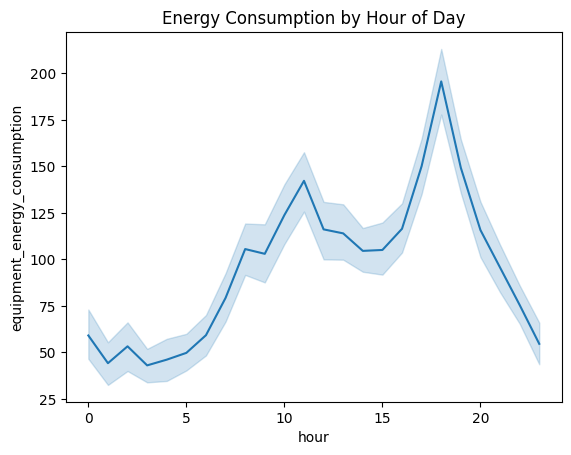

In [46]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Plot energy usage by hour
sns.lineplot(x='hour', y='equipment_energy_consumption', data=df)
plt.title("Energy Consumption by Hour of Day")
plt.show()


In [47]:
# Lag features for temporal patterns
df['energy_lag_1'] = df['equipment_energy_consumption'].shift(1)
df['energy_lag_3'] = df['equipment_energy_consumption'].shift(3)
df['energy_roll_mean_3h'] = df['equipment_energy_consumption'].rolling(3).mean()

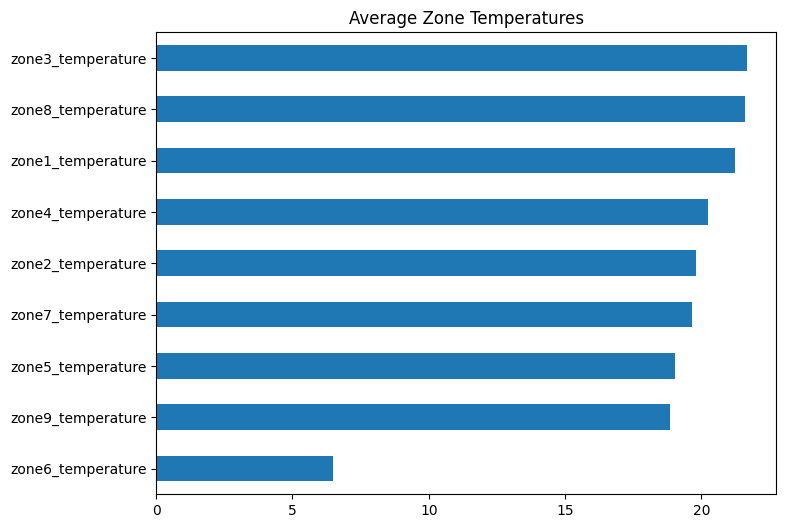

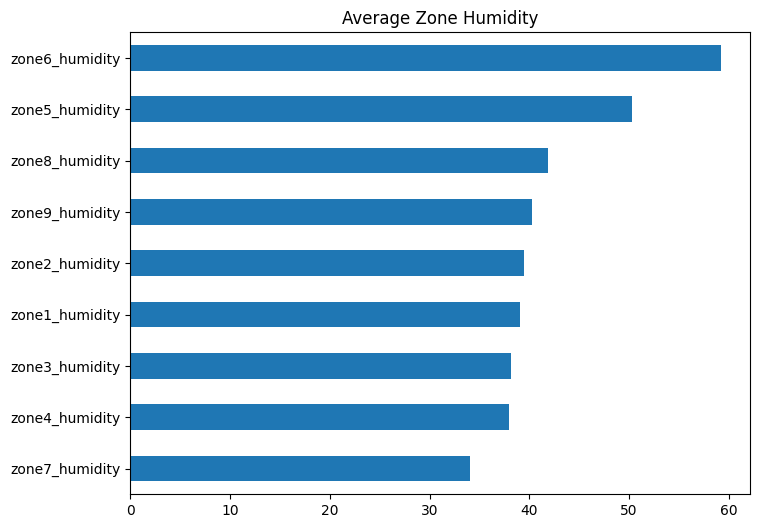

In [48]:
zone_temps = [col for col in df.columns if 'zone' in col and 'temperature' in col]
zone_humidity = [col for col in df.columns if 'zone' in col and 'humidity' in col]

df[zone_temps].mean().sort_values().plot(kind='barh', figsize=(8,6), title='Average Zone Temperatures')
plt.show()

df[zone_humidity].mean().sort_values().plot(kind='barh', figsize=(8,6), title='Average Zone Humidity')
plt.show()


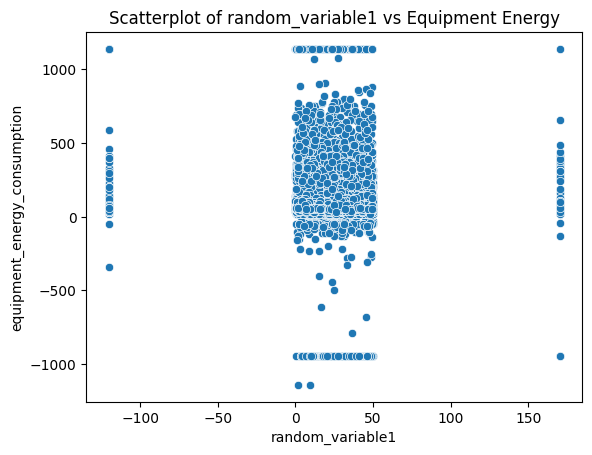

Correlation with target: -0.01615519898815763


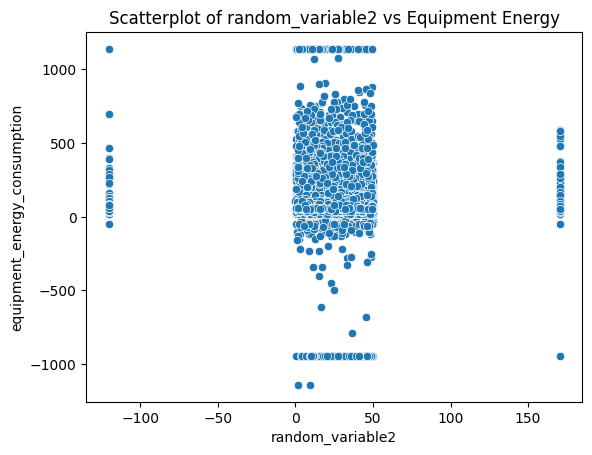

Correlation with target: -0.011387127326762442


In [49]:
for var in ['random_variable1', 'random_variable2']:
    sns.scatterplot(x=var, y='equipment_energy_consumption', data=df)
    plt.title(f"Scatterplot of {var} vs Equipment Energy")
    plt.show()

    print(f"Correlation with target: {df[var].corr(df['equipment_energy_consumption'])}")


In [50]:
# Ensure all numeric fields are float
numeric_cols = df.columns.drop('timestamp')

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [51]:
# Drop rows with missing target
df = df.dropna(subset=['equipment_energy_consumption'])

# Fill remaining missing values with median
df.fillna(df.median(), inplace=True)

# Confirm no missing values left
assert df.isnull().sum().sum() == 0

In [52]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Optionally drop timestamp
df.drop(columns='timestamp', inplace=True)


In [53]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# Apply to main numerical columns
for col in df.select_dtypes(include='float64').columns:
    df[col] = cap_outliers(df[col])


In [54]:
from sklearn.preprocessing import StandardScaler

# Exclude target
features = df.drop(columns='equipment_energy_consumption')
target = df['equipment_energy_consumption']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Rebuild dataframe
X = pd.DataFrame(scaled_features, columns=features.columns)

y = target.reset_index(drop=True)


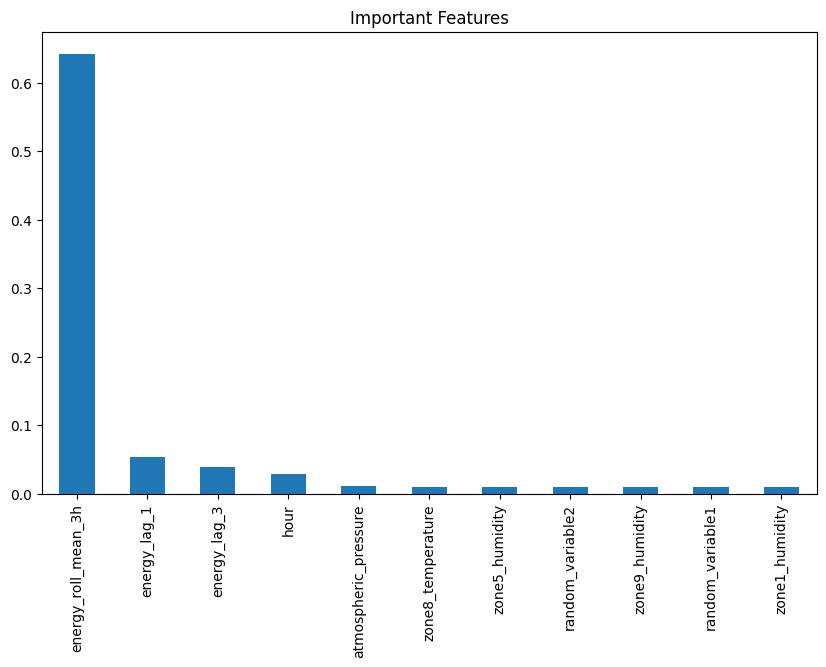

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = importances[importances > 0.01].sort_values(ascending=False)

plt.figure(figsize=(10,6))
important_features.plot(kind='bar')
plt.title("Important Features")
plt.show()

# Keep only important features
X = X[important_features.index]


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (12756, 11)
Test shape: (3189, 11)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

def evaluate(y_true, y_pred, label='Model'):
 print(f"--- {label} ---")
 rmse = np.sqrt(mean_squared_error(y_true, y_pred))
 mae = mean_absolute_error(y_true, y_pred)
 r2 = r2_score(y_true, y_pred)
 print("RMSE:", rmse)
 print("MAE:", mae)
 print("R²:", r2)

evaluate(y_test, y_pred_lr, label='Linear Regression')



--- Linear Regression ---
RMSE: 28.02165250678096
MAE: 18.13213899089647
R²: 0.6168493257198293


In [58]:
# Reuse unscaled features for tree models
X_tree = features[important_features.index]
y_tree = target

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42
)


In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_tree, y_train_tree)

y_pred_rf = rf.predict(X_test_tree)
evaluate(y_test_tree, y_pred_rf, label='Random Forest')


--- Random Forest ---
RMSE: 24.1783077745253
MAE: 14.271218252580985
R²: 0.7147445760131059


In [61]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train_tree, y_train_tree)

y_pred_xgb = xgb.predict(X_test_tree)
evaluate(y_test_tree, y_pred_xgb, label='XGBoost')


--- XGBoost ---
RMSE: 24.39594805915087
MAE: 14.514704629503175
R²: 0.709586027146298


In [63]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgbm.fit(X_train_tree, y_train_tree)

y_pred_lgbm = lgbm.predict(X_test_tree)
evaluate(y_test_tree, y_pred_lgbm, label='LightGBM')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 12756, number of used features: 11
[LightGBM] [Info] Start training from score 77.520383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

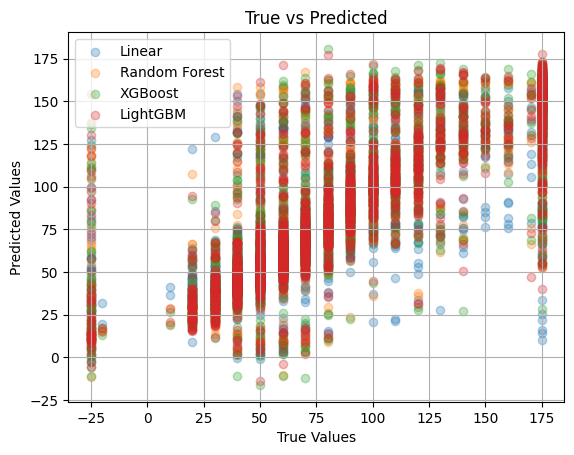

In [64]:
import matplotlib.pyplot as plt

models = {
    "Linear": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgbm
}

for name, pred in models.items():
    plt.scatter(y_test_tree, pred, alpha=0.3, label=name)

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [65]:
import joblib

# Saving the best performing model
joblib.dump(xgb, 'best_energy_model.pkl')


['best_energy_model.pkl']

In [66]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# XGBoost Hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize model
xgb = XGBRegressor(random_state=42)

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                               scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_tree, y_train_tree)

# Get the best parameters and model
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_

# Print the best parameters
print("Best XGBoost Hyperparameters:", best_xgb_params)


Best XGBoost Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}


In [67]:
from lightgbm import LGBMRegressor

# LightGBM Hyperparameter grid
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 6, 10]
}

# Initialize model
lgbm = LGBMRegressor(random_state=42)

# Setup GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm,
                                scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit GridSearchCV
grid_search_lgbm.fit(X_train_tree, y_train_tree)

# Get the best parameters and model
best_lgbm_model = grid_search_lgbm.best_estimator_
best_lgbm_params = grid_search_lgbm.best_params_

# Print the best parameters
print("Best LightGBM Hyperparameters:", best_lgbm_params)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 12756, number of used features: 11
[LightGBM] [Info] Start training from score 77.520383
Best LightGBM Hyperparameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}


In [68]:
# Evaluate tuned XGBoost model
y_pred_xgb_tuned = best_xgb_model.predict(X_test_tree)
evaluate(y_test_tree, y_pred_xgb_tuned, label='Tuned XGBoost')

# Evaluate tuned LightGBM model
y_pred_lgbm_tuned = best_lgbm_model.predict(X_test_tree)
evaluate(y_test_tree, y_pred_lgbm_tuned, label='Tuned LightGBM')


--- Tuned XGBoost ---
RMSE: 24.375054512273906
MAE: 14.605512144893884
R²: 0.7100832555886398
--- Tuned LightGBM ---
RMSE: 24.290236077174892
MAE: 14.566769461492914
R²: 0.7120974050027127


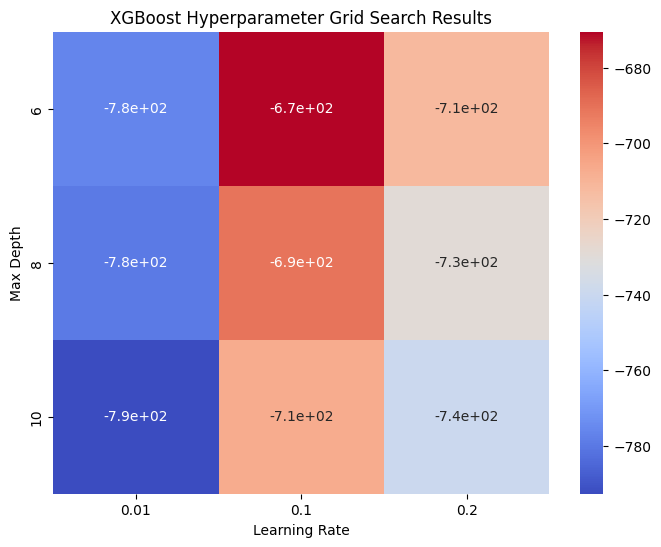

In [69]:
import matplotlib.pyplot as plt

# XGBoost Grid Search results
results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
results_xgb = results_xgb.pivot_table(index='param_max_depth', columns='param_learning_rate', values='mean_test_score')

# Plot heatmap for XGBoost
plt.figure(figsize=(8, 6))
plt.title("XGBoost Hyperparameter Grid Search Results")
sns.heatmap(results_xgb, annot=True, cmap='coolwarm')
plt.xlabel('Learning Rate')
plt.ylabel('Max Depth')
plt.show()


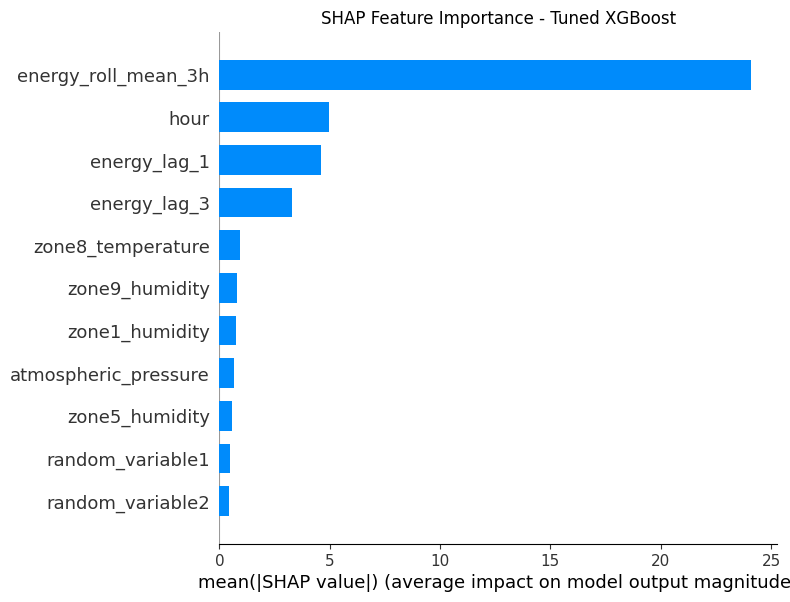

In [72]:
def explain_model(model, X_data, model_name):
    plt.figure(figsize=(10,6))

    if "Linear" in model_name:
        explainer = shap.LinearExplainer(model, X_data)
    else:
        explainer = shap.TreeExplainer(model)

    shap_values = explainer.shap_values(X_data)
    shap.summary_plot(shap_values, X_data, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance - {model_name}")
    plt.show()

# Explain best model (XGBoost)
explain_model(best_xgb_model, X_test_tree, "Tuned XGBoost")

In [74]:
# Get top 3 influential features
shap_values = shap.TreeExplainer(best_xgb_model).shap_values(X_test_tree)
top_features = X.columns[np.abs(shap_values).mean(0).argsort()[-3:][::-1]]

print(f"""
Energy Reduction Recommendations:
1. Optimize {top_features[0]} control systems
2. Monitor {top_features[1]} during peak hours
3. Maintain {top_features[2]} within optimal ranges
""")



Energy Reduction Recommendations:
1. Optimize energy_roll_mean_3h control systems
2. Monitor hour during peak hours
3. Maintain energy_lag_1 within optimal ranges



In [75]:
# Peak hour analysis
peak_hour = df.groupby('hour')['equipment_energy_consumption'].mean().idxmax()
print(f"Peak energy consumption occurs at {peak_hour}:00 - consider load shifting")

Peak energy consumption occurs at 18:00 - consider load shifting
